# Reducing Customer Churn at Telco

---

## Project Goals

The goal of this project is to identify drivers of customer churn at Telco, produce a prediction model to identify 
which customers are at the highest risk of churning, and offer a recommendation for reducing customer churn.

---

## Project Description

Telco customers are churning at an unacceptably high rate which is affecting the company's bottom line. Retaining
existing customers costs far less than signing new customers. As such we want to reduce churn in order to help
Telco's bottom line rather than relying on signing new customers to make up the difference. We will compare
and contrast customers who have churned versus those who haven't to determine the attributes that are driving 
customers to churn. We will produce a prediction model to help identify the customers that are at the highest risk 
of churning and we will provide a list of customers who are likely to churn (provided in predictions.csv). Finally, 
we will offer a recommended course of action to help promote customer retention.

---

## Initial Questions

Before beginning a few initial questions were formulated from an initial high level overview of the data available. Here are the questions that this project aimed to answer:

- Are customers who have been with Telco a longer time less likely to churn?
- Do customers with high monthly charges churn more frequently?
- Are customers on a month to month contract more likely to churn?
- Are customers with automatic payment setup less likely to churn?
- Is there a difference in churn frequency between customers with phone service and those without?
- Is there a relationship between customers who churn and internet service type?
- Is there a relationship between gender and customers who churn?
- Do customers with tech support churn less frequently?

With this in mind we are now able to begin preparing and analyzing the data.

---

## Importing the Required Modules

Everything we need to run the code blocks in this report are located in the util folder.
To run the code blocks in this report you will need numpy, pandas, matplotlib, seaborn and sklearn installed on your computer.

In [1]:
# Here we are importing all the functions we need to execute the code blocks in this report.

from util.acquire import get_telco_data
from util.prepare import prep_telco_data, split_data
from util.explore import *
from util.model import *

# We would like to ignore any warnings provided by the libraries we use for presentation purposes.
import warnings
warnings.filterwarnings("ignore")

---

## Data Acquisition

When running this notebook for the first time the Telco customer data will be acquired from the MySQL database hosted at data.codeup.com. This data will be saved in a file "telco.csv" for quicker access in the future. The "telco.csv" file will only be saved locally and will not be found in the Github repository.

In [2]:
# We will now acquire the Telco customer dataset either from the MySQL database or from a .csv file
# depending on whether or not the data has been saved.

telco_customers = get_telco_data()

---

## Data Preparation

To prepare the dataset for exploratory analysis and modeling we needed to remove redundant columns and deal with missing or otherwise unusual values. Missing values could be values that are absent in one form or another and unusual values could be values that do not match the form that the majority of data in a single column follow. Redundant columns would be columns that essentially represent the same data as another column.

*Missing values:* A small number of rows (11 out of 7043) were discovered to have missing values for the total charges column. These were customers who have recently signed a contract with Telco and have not had the opportunity to churn yet. It was decided that these customers could be removed from the dataset without affecting our final results.

*Redundant or otherwise useless columns:* Three columns from our dataset were discovered to either hold data that would not influence customer churn or held data that was the same as another column. It was decided that these columns would be removed from the dataset since we would not need them.

In [3]:
# Here we prepare our dataset so that it will be ready for our exploration and modeling phases.

telco_customers = prep_telco_data(telco_customers)

We split our data into three datasets: a train dataset (56% of the original data) will be used for training our machine learning models, a validate dataset (24% of the original data) will be used for comparing the performance of 
models, and a test dataset (20% of the original data) will be used as a final check to see how our best model performs on unseen data.

In [4]:
# Here we split our data into train, validate and test datasets

train, validate, test = split_data(telco_customers, stratify = 'churn')

**Important Note: The validate and test datasets are meant to serve as out of sample data. We only use the validate set to compare our machine learning models and we don't use the test set until we have chosen our best model.**

---

## Exploratory Analysis

With the data prepared we are now able to explore the data in order to identify drivers of churn.

**Important Note: In exploratory analysis we only analyze the train dataset to maintain the integrity of our work.**

In the following chart we see the distribution of customers in our data separated into two groups: customers that haven't churned and customers that have churned.

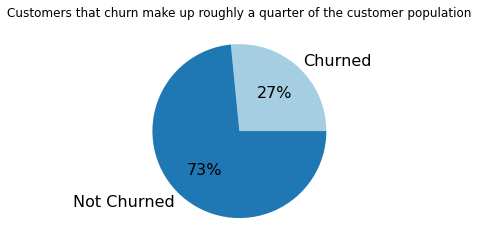

In [5]:
# Here we visualize the distribution of the churn feature in our data. Details can be found in the explore.py file in the
# util directory.
distribution_of_customer_churn(train)

It was discovered when analyzing the data that the vast majority of customers that churn are on the month to month contract. The following chart displays this finding by showing the distribution of customers who have churned versus those that haven't churned separated by the type of contract the customer has.

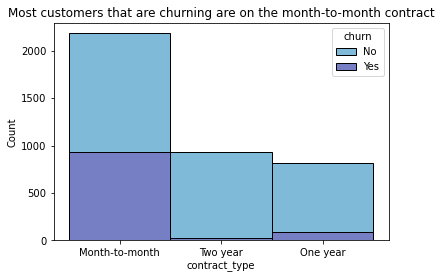

In [6]:
# Here we visualize the distribution of contract types separated by whether or not a customer has churned. Details can be 
# found in the explore.py file in the util directory.
visualize_churn_rate_versus_contract_type(train)

It was also discovered that a large number of customers that churn do not have tech support. In the following chart we see the distribution of customers with or without tech support versus whether or not they churned.

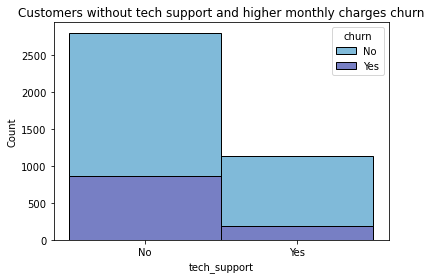

In [7]:
# Here we visualize the distribution of payment types separated by whether or not a customer has churned. Details can be 
# found in the explore.py file in the util directory.
visualize_churn_rate_versus_tech_support(train)

When looking at the tenure feature it was discovered that a large number of customers that churn have low tenure. The following chart shows the distribution of customers who have churned versus those that haven't separated by tenure.

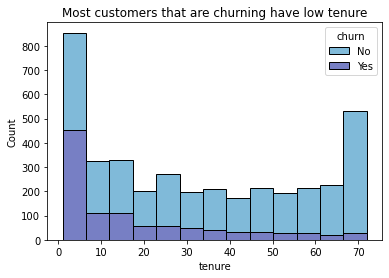

In [8]:
# Here we visualize the distribution of tenure separated by whether or not a customer has churned. Details can be found in
# the explore.py file in the util directory.
visualize_churn_rate_versus_tenure(train)

Lastly we found that a large proporation of customers that are churning are doing so in the first 24 months of service and most of these customers have high monthly charges. This last visualization shows the monthly charges of customers that have churned and have less than or equal to 24 months of tenure.

Tenure less than or equal to 24, percentage of churn pop.: 71.89%


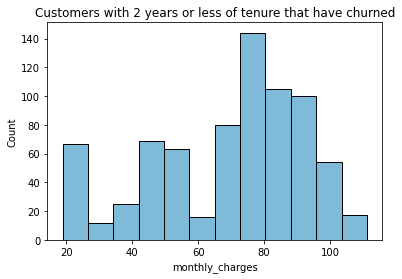

In [9]:
# Here we visualize the monthly charges of customers that have churned and have less than or equal
# to 24 months of tenure. Details can be found in the explore.py file in the util directory.
visualize_monthly_charges_versus_tenure(train)

This then led us to ask the following questions about our data:
- Do customers that churn have higher monthly charges on average than customers that don't churn?
- Do customers that churn have less tenure on average than customers that don't churn?
- Does the contract type a customer has have any association with whether or not they will churn?
- Does whether or not a customer has tech support have any association with whether or not they will churn?

We formally address these questions in the form of statistical hypotheses and test the validity of these assertions through the use of statistical tests below.

Here we address the first question about monthly charges:

> $H_0$: The mean monthly charges of customers that churn is less than or equal to the mean monthly charges of customers that do not churn.
> <br>
> $H_a$: The mean monthly charges of customers that churn is greater than the mean monthly charges of customers that do not churn.

In [10]:
# Here we will perform a two sample t-test where one sample is the monthly charges of customers that churn and the
# other sample is the monthly charges of customers that do not churn. For the details of how this test is performed
# refer to the explore.py file in the util directory.

perform_two_sample_ttest_on_monthly_charges(train)


Reject H0


The result is to reject the null hypothesis that the mean monthly charges of customers that churn is less than or equal to the mean monthly charges of customers that do not churn. This means that we are justified in asking if customers that churn have higher monthly charges on average than those that don't.

Now we will address the second question about tenure:

> $H_0$: Customers that churn do not have less tenure on average than customers that don't churn.
> <br>
> $H_a$: Customers that churn have less tenure on average than customers that don't churn.

In [11]:
# Here we will perform a two sample t-test where one sample is the tenure of customers that churn and the
# other sample is the tenure of customers that do not churn. For the details of how this test is performed
# refer to the explore.py file in the util directory.

perform_two_sample_ttest_on_tenure(train)


Reject H0


The result is to reject the null hypothesis that the mean tenure of customers that churn is not less than the mean monthly charges of customers that do not churn. This means that we are justified in asking if customers that churn have lower tenure on average than those that don't.

Next we will address the third question about contract type:

> $H_0$: There is no association between churn and contract type.
> <br>
> $H_a$: There is an association between churn and contract type.

In [12]:
# Here we will perform a chi2 test where we compare the churn and contract_type features. For the details of 
# how this test is performed refer to the explore.py file in the util directory.

perform_chi2_test_on_contract_type(train)


Reject H0


The result is to reject the null hypothesis that there is no association between a customer's contract type and whether or not they churn. This means that we are justified in asking if a customer's contract type can be an indicator of whether or not they may churn.

Finally we address the fourth question about payment type:

> $H_0$: There is no association between churn and whether or not a customer has tech support.
> <br>
> $H_a$: There is an association between churn and whether or not a customer has tech support.

In [13]:
# Here we will perform a chi2 test where we compare the churn and tech_support features. For the details of 
# how this test is performed refer to the explore.py file in the util directory.

perform_chi2_test_on_tech_support(train)


Reject H0


The result is to reject the null hypothesis that there is no association between tech support and whether or not they churn. This means that we are justified in asking if whether or not a customer has tech support can be an indicator of whether or not they may churn.

With these results we identify monthly charges, tenure, contract type, and tech support as being the most likely drivers of churn. These are the features we will use to train the machine learning models.

---

## Modeling

With our most likely drivers of churn identified we moved forward with creating some machine learning models that would allow us to identify customers that are likely to churn so that action can be taken to retain these customers. Three different models were created to predict customer churn and the performance of these were compared primarily by their recall scores and secondarily by there accuracy scores.

I chose to focus on recall because the cost of signing new customers is greater than the cost of retaining an existing customer. As such the cost of falsely identifying a customer as not likely to churn is greater than the cost of falsely identifying a customer as likely to churn. This aligns with the goal of optimizing for recall which is to reduce missed positive cases.

The three models used were the following:

1. A decision tree model
2. A random forest model
3. A k nearest neighbors model
    
Additionally a baseline model was established which predicts that all customers do not churn (since customers not churning is the most common outcome in the data). This model is used as a means of comparing whether or not our models are capable of performing better than the simplest model we can concoct.

Below we visualize the performance of each model and the baseline on both the train dataset and the validate dataset.

**Important Note: In modeling we do not use the test dataset to maintain the integrity of our work. Once we have chosen our best model we can measure its performance on the test dataset.**

In [14]:
# First we need to create our models. Here we will create a decision tree model, a random forest model, and a
# k nearest neighbors model. For details refer to the model.py file in the util directory. Details can be found
# in the model.py file in the util directory.
models = create_models(train)

In [15]:
# Here we will visualize the performance of our three models, and the baseline model, on our train dataset.
# For details on how the models are implemented refer to the model.py file in the util directory. Details can be
# found in the model.py file in the util directory.
print('Performance of Each Model for the Train Dataset')
visualize_performance_of_models(train, models)

Performance of Each Model for the Train Dataset


,accuracy,precision,recall
model,,,
Baseline,0.73,0.00,0.00
Decision Tree,0.79,0.60,0.61
Random Forest,0.80,0.68,0.44
K Nearest Neighbors,0.81,0.72,0.46


In [16]:
# Next we will visualize the performance of our models on the validate dataset to compare the models on a
# theoretically out of sample dataset. Details can be found in the model.py file in the util directory.
print('Performance of Each Model for the Validate Dataset')
visualize_performance_of_models(validate, models)

Performance of Each Model for the Validate Dataset


,accuracy,precision,recall
model,,,
Baseline,0.73,0.00,0.00
Decision Tree,0.78,0.60,0.59
Random Forest,0.79,0.68,0.41
K Nearest Neighbors,0.78,0.66,0.38


The results above show us that in terms of our metric in focus, recall, the decision tree model has the best performance overall. Although the k nearest neighbors model performed better on the train dataset, it failed to remain consistent when we introduced our out of sample data. Additionally in terms of accuracy the decision tree model still has the best performance. With these results in mind the decision tree model is chosen as the best model and we will make our final predictions on the test dataset using this model. The results of these predictions will be saved in the predictions.csv file.

In [17]:
# Here we will visualize the performance of our model on the test dataset and write the results to the
# predictions.csv file. We pass only the decision tree model to the function. Details can be found in the
# model.py file in the util directory.
print('Performance of the best model on unseen data')
make_predictions_on_test(test, telco_customers, models['Decision Tree'])

Performance of the best model on unseen data


,accuracy,precision,recall
model,,,
Decision Tree,0.78,0.57,0.6


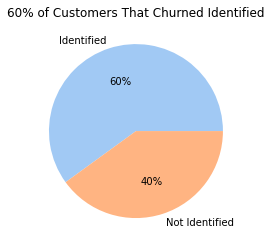

In [18]:
# Here we will see a pie chart of our model's performance on the test dataset.
visualize_test_performance()

The decision tree model accurately predicted whether or not a customer would churn for 77% of the test dataset and correctly identified 60% of the customers that churned. Let's see below how this affects our churn rate.

In [19]:
# Show the percentage of customers that churned.
percentage_of_customers_that_churned(test)

Percentage of customers in the test dataset that churned:
26.58%


In [20]:
# Show the percentage of customers that churn considering that the customers we identified do not churn.
reduced_percentage(0.2658, 0.6043)

Percentage of customers in the test dataset that churned
with the 41% we identified not churning:
10.52%


With the customers we identify as likely to churn we could potentially see a roughly 16% decrease in customer churn.

---

## Key Takeaways and Recommendations



To conclude, with this model in production we could see as much as an 16% reduction in churn. In order to ensure this happens action must be taken. Our decision tree model allows us to look under the hood and easily interpret how the decisions are being made. For a detailed breakdown of this refer to the "Looking Under the Hood" section in the model.ipynb notebook in the notebooks directory.

Here I will provide my recommended course of action formulated with the help of the decision tree model breakdown:
- Customers identified as likely to churn who are on the month to month contract and have monthly charges exceeding 67 dollars should be offered an incentive to switch to a yearly contract or offered a discount on their monthly rate.
- Customers identified as likely to churn who are not on the month to month contract should be offered a discount to reduce their monthly charges a small percentage.

Given more time I would like to perform more analysis on the data to identify additional drivers of churn and fine tune the machine learning models to obtain greater accuracy.